In [1]:
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import tensorflow as tf
import random

# Set seeds for reproducibility
def set_seed(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)

set_seed(42)

In [5]:
# Load the data

import pandas as pd

df = pd.read_csv('drive/MyDrive/Methodology/Applied ML Finali/mbti_1.csv')



df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [6]:
df['type'].value_counts()

,count
type,
INFP,1832
INFJ,1470
INTP,1304
INTJ,1091
ENTP,685
ENFP,675
ISTP,337
ISFP,271
ENTJ,231


In [7]:
missing_values = df.isnull().sum()
df_description = df.describe(include='all')
missing_values, df_description

(type     0
 posts    0
 dtype: int64,
         type                                              posts
 count   8675                                               8675
 unique    16                                               8675
 top     INFP  'It has been too long since I have been on per...
 freq    1832                                                  1)

In [8]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

<ipython-input-9-233c60f1c1c3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, palette="tab10")


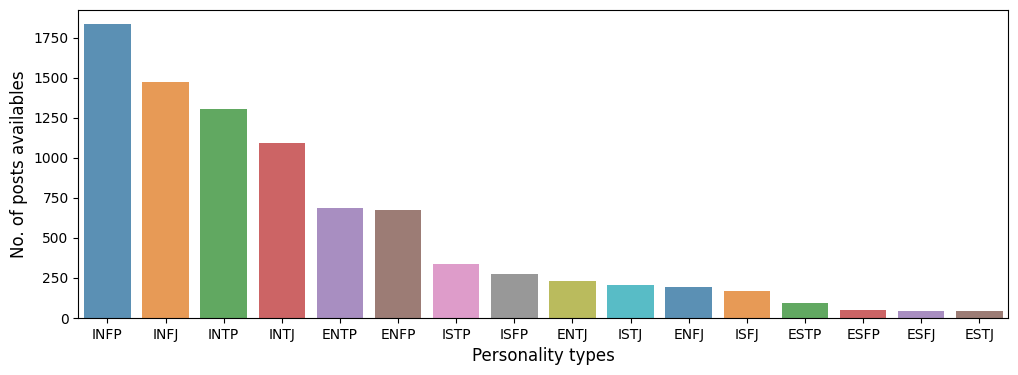

In [9]:
# Plotting this in descending order for better understanding of this visualization
cnt_srs = df['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, palette="tab10")
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts availables', fontsize=12)
plt.show()

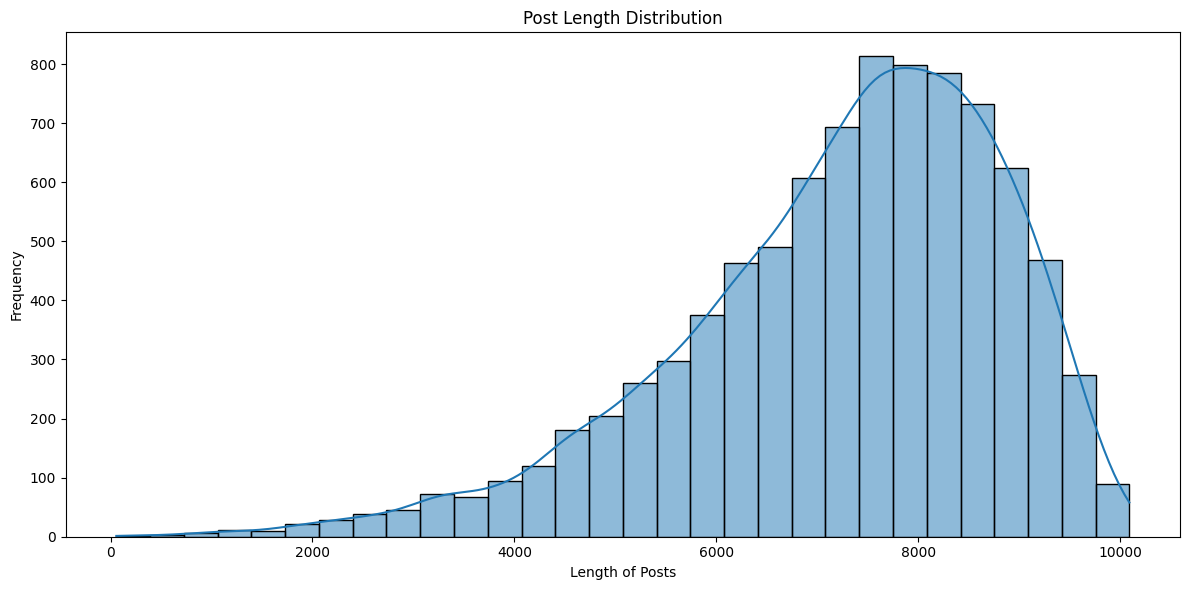

In [10]:
# EDA

# Post Length Distribution
df['post_length'] = df['posts'].apply(lambda x: len(x))

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='post_length', bins=30, kde=True)
plt.title('Post Length Distribution')
plt.xlabel('Length of Posts')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

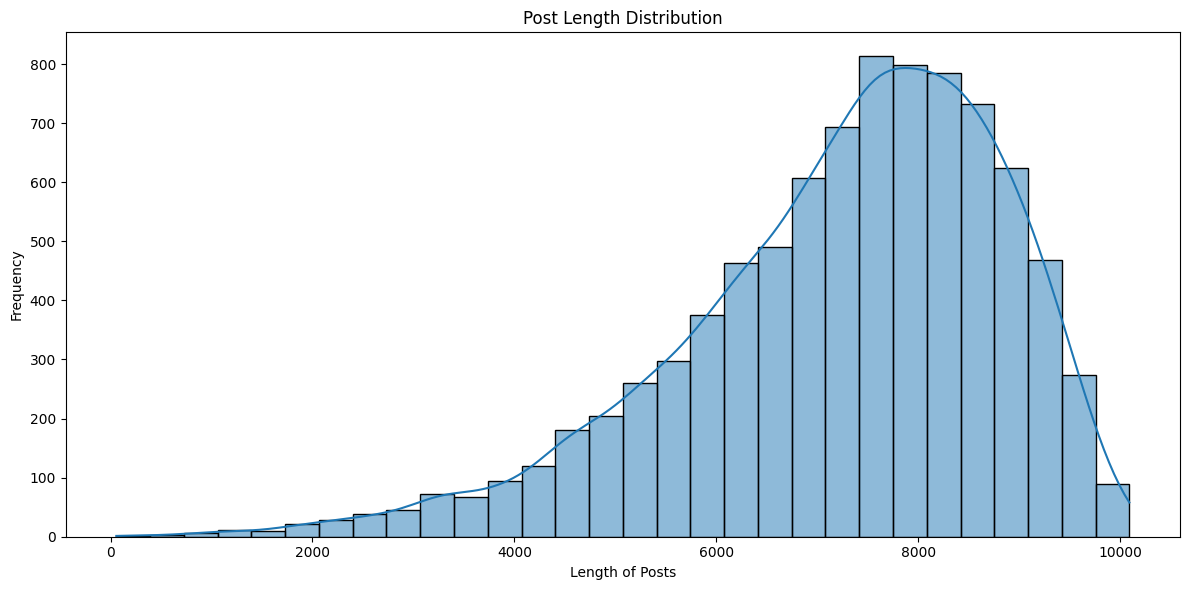

In [11]:
# EDA

# Post Length Distribution
df['post_length'] = df['posts'].apply(lambda x: len(x))

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='post_length', bins=30, kde=True)
plt.title('Post Length Distribution')
plt.xlabel('Length of Posts')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<ipython-input-14-17381ecc27e9>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,k+1)


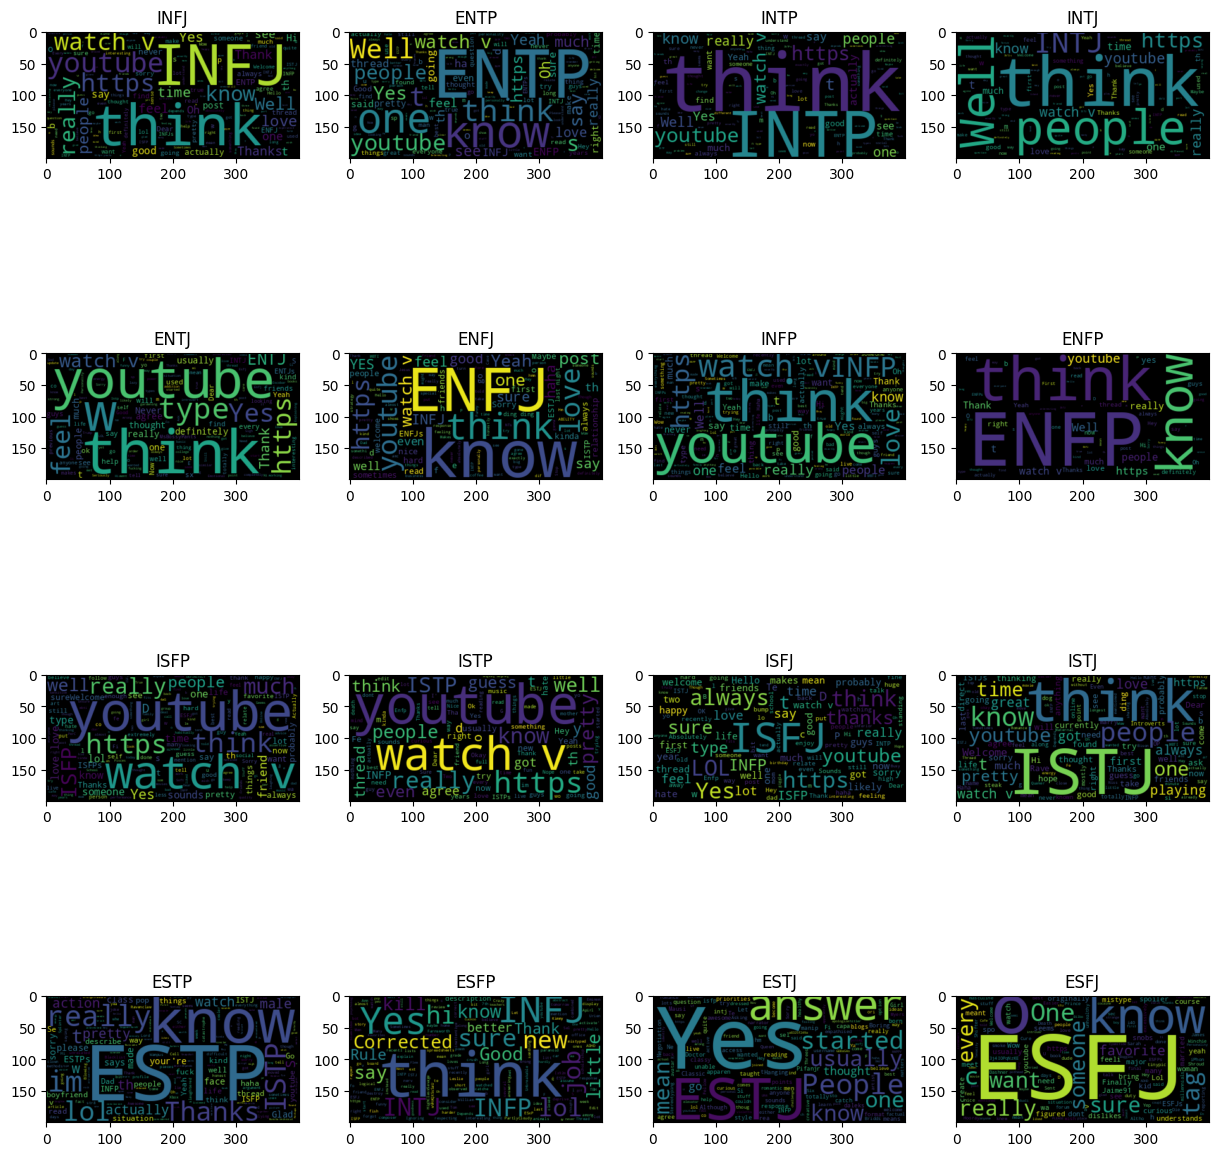

In [14]:
import wordcloud
from wordcloud import WordCloud
fig, ax = plt.subplots(len(df['type'].unique()), figsize=(15,len(df['type'].unique())))
k = 0
for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

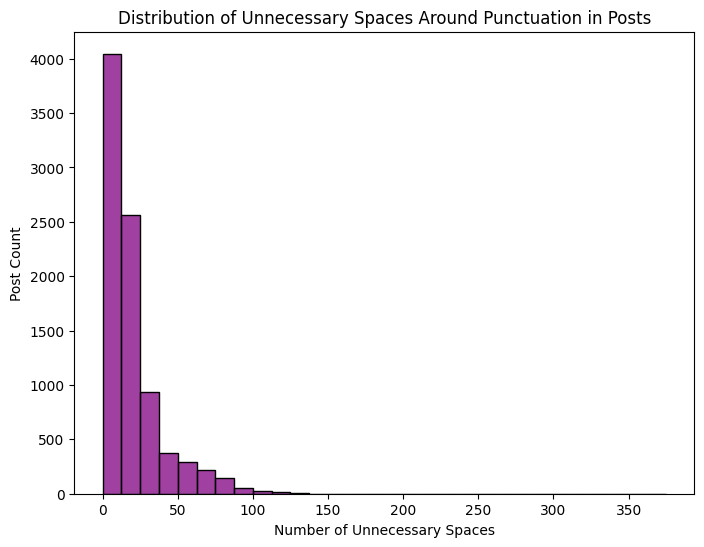

,unnecessary_punct_spaces
count,8675.000000
mean,19.612911
std,19.635009
min,0.000000
25%,7.000000
50%,13.000000
75%,24.000000
max,375.000000


In [15]:
import re

def count_unnecessary_spaces_around_punctuation(text):
    spaces_before_commas = len(re.findall(r'\s,', text))
    spaces_before_periods = len(re.findall(r'\s\.', text))
    # Count spaces after periods where it is not followed by a digit or letter (considered likely unnecessary)
    spaces_after_periods = len(re.findall(r'\.\s(?![0-9A-Za-z])', text))
    return spaces_before_commas + spaces_before_periods + spaces_after_periods

df['unnecessary_punct_spaces'] = df['posts'].apply(count_unnecessary_spaces_around_punctuation)

plt.figure(figsize=(8, 6))
sns.histplot(df['unnecessary_punct_spaces'], bins=30, kde=False, color='purple')
plt.title('Distribution of Unnecessary Spaces Around Punctuation in Posts')
plt.xlabel('Number of Unnecessary Spaces')
plt.ylabel('Post Count')
plt.show()

# Return the statistics for unnecessary spaces around punctuation
punctuation_space_stats = df['unnecessary_punct_spaces'].describe()
punctuation_space_stats

In [16]:
def count_pipes(text):
    return text.count('|||')

def count_urls(text):
    return len(re.findall(r'https?://\S+|www\.\S+', text))

df['pipe_count'] = df['posts'].apply(count_pipes)
df['url_count'] = df['posts'].apply(count_urls)

total_pipe_count = df['pipe_count'].sum()
total_url_count = df['url_count'].sum()

total_pipe_count, total_url_count


(414170, 24939)

<ipython-input-17-ed04d32bf7d4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Count Type', y='Total', data=df_counts, palette="tab10")


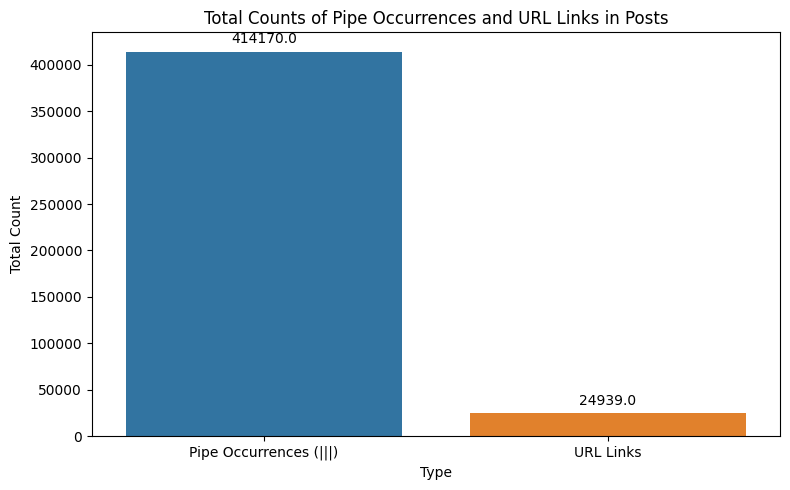

In [17]:
counts_data = {
    'Count Type': ['Pipe Occurrences (|||)', 'URL Links'],
    'Total': [total_pipe_count, total_url_count]
}

df_counts = pd.DataFrame(counts_data)

plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='Count Type', y='Total', data=df_counts, palette="tab10")
plt.title('Total Counts of Pipe Occurrences and URL Links in Posts')
plt.ylabel('Total Count')
plt.xlabel('Type')

# Loop through the bars and add text annotations
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()

<ipython-input-18-e11513dbf964>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="type", y="words_per_comment", data=df, palette="tab10")
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 42.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 61.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sea

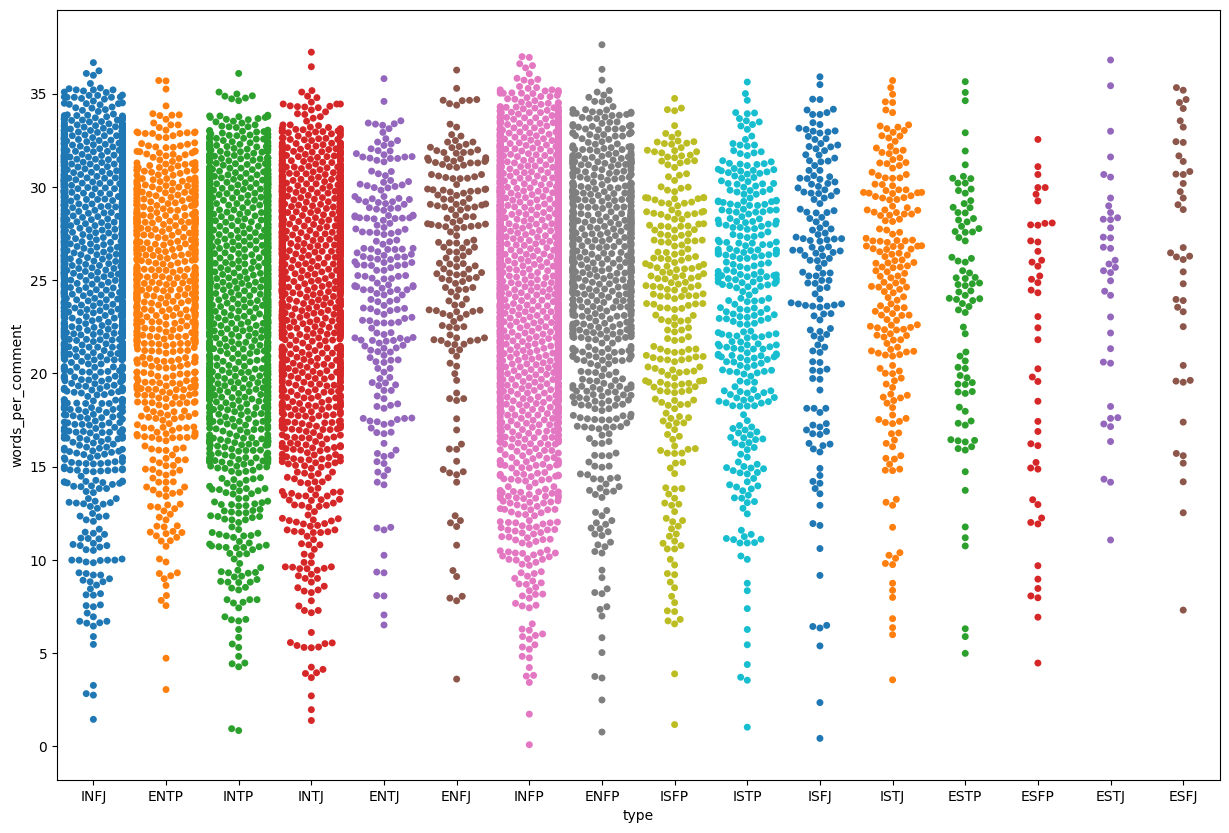

In [18]:
# Function to count the number of words in each post of a user
import numpy as np
def var_row(row):
    word_counts = [len(post.split()) for post in row.split('|||')]
    return np.var(word_counts)

# Assuming df is your DataFrame and 'posts' is the column with the text data
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df['variance_of_word_counts'] = df['posts'].apply(var_row)

# Creating the plot
plt.figure(figsize=(15, 10))
sns.swarmplot(x="type", y="words_per_comment", data=df, palette="tab10")
plt.show()

In [19]:
nltk.data.path.append('/path/to/nltk_data')
nltk.download('punkt', download_dir='/path/to/nltk_data')

[nltk_data] Downloading package punkt to /path/to/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-20-5b09a7a4a9c8>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in most_common_lemmatized_non_english], y=[word[1] for word in most_common_lemmatized_non_english],palette="tab10" )


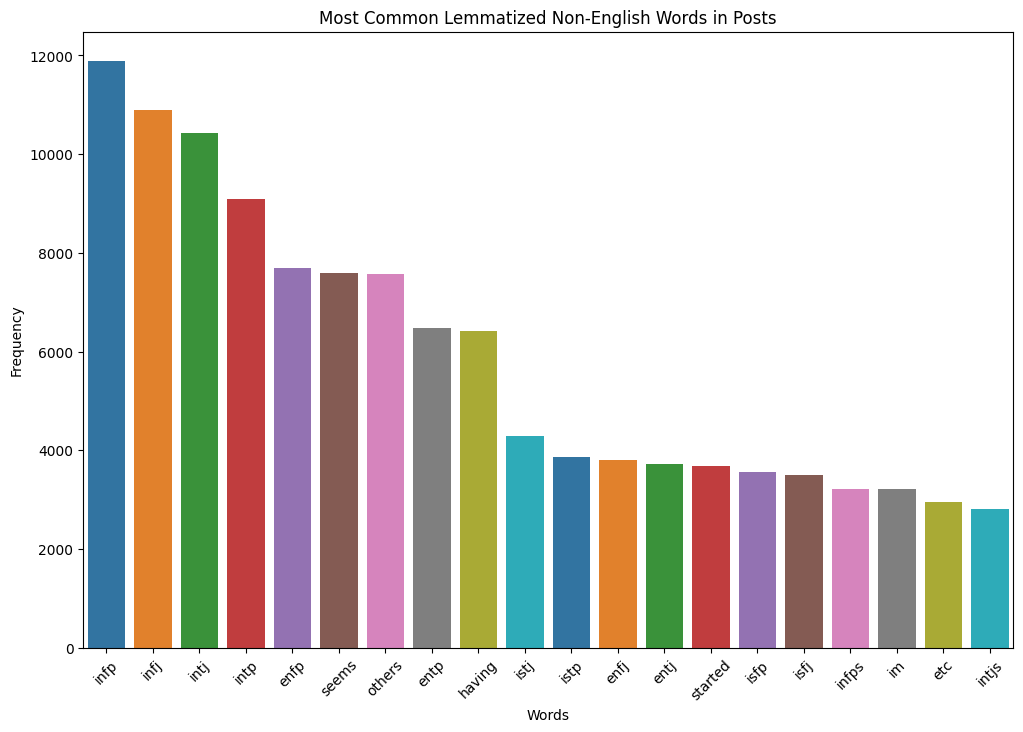

In [20]:
import nltk
from nltk.corpus import words, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')

english_words = set(words.words())
# Expand the list of English words using WordNet lemmas
for synset in wordnet.all_synsets():
    for lemma in synset.lemmas():
        english_words.add(lemma.name().lower())

# Manually curate a list of words that should be treated as English
manual_inclusions = set(['http', 'mbti', 'lol', 'le'])  # Add more words as needed
english_words.update(manual_inclusions)

lemmatizer = WordNetLemmatizer()

def lemmatized_non_english_words(text):
    tokens = word_tokenize(text)
    # Lemmatize and filter out non-English words
    lemmatized_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha()]
    non_english = [token for token in lemmatized_tokens if token not in english_words]
    return non_english

df['lemmatized_non_english_words'] = df['posts'].apply(lemmatized_non_english_words)

# Flatten the list of lemmatized non-English words and count occurrences
all_lemmatized_non_english_words = [word for sublist in df['lemmatized_non_english_words'] for word in sublist]
lemmatized_non_english_word_counts = Counter(all_lemmatized_non_english_words)

most_common_lemmatized_non_english = lemmatized_non_english_word_counts.most_common(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=[word[0] for word in most_common_lemmatized_non_english], y=[word[1] for word in most_common_lemmatized_non_english],palette="tab10" )
plt.title('Most Common Lemmatized Non-English Words in Posts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<ipython-input-21-5cc22fb95229>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_personality_mentions.index, y=total_personality_mentions.values, palette="tab10")


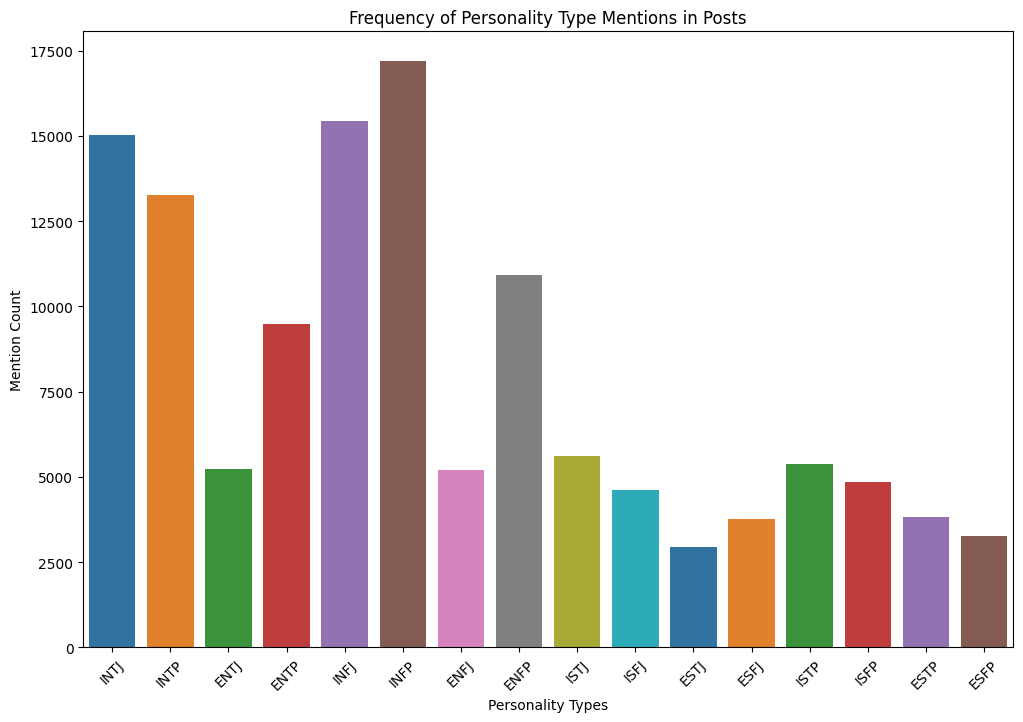

In [21]:
personality_types = [
    'INTJ', 'INTP', 'ENTJ', 'ENTP', 'INFJ', 'INFP', 'ENFJ', 'ENFP',
    'ISTJ', 'ISFJ', 'ESTJ', 'ESFJ', 'ISTP', 'ISFP', 'ESTP', 'ESFP'
]

def count_personality_mentions(text):
    counts = {ptype: 0 for ptype in personality_types}
    for ptype in personality_types:
        counts[ptype] = len(re.findall(ptype, text, flags=re.IGNORECASE))
    return counts

personality_mentions = df['posts'].apply(count_personality_mentions)

total_personality_mentions = pd.DataFrame(list(personality_mentions)).sum()
plt.figure(figsize=(12, 8))
sns.barplot(x=total_personality_mentions.index, y=total_personality_mentions.values, palette="tab10")
plt.title('Frequency of Personality Type Mentions in Posts')
plt.xlabel('Personality Types')
plt.ylabel('Mention Count')
plt.xticks(rotation=45)
plt.show()

In [22]:
import re

personality_types = ['infp', 'infj', 'intp', 'intj', 'entp', 'enfp', 'istp', 'isfp',
                     'entj', 'istj', 'enfj', 'isfj', 'estp', 'esfp', 'esfj', 'estj']
personality_pattern = r'\b(' + '|'.join(personality_types) + r')\b'

def cleaning_text(text):
    # Lowercase and remove URLs
    text = text.lower()
    # text = re.sub(r'\bhttps?:\/\/\S+|www\.\S+\b', '', text)
    # text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove non-alphanumeric characters and extra spaces
    text = re.sub(r'[^0-9a-z]+', ' ', text)
    # Remove personality types
    text = re.sub(personality_pattern, '', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [23]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def data_preprocessing(text):
  # Split, remove stopwords, and lemmatize
  text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Apply cleaning text process and data preprocessing
df['clean'] = df['posts'].apply(cleaning_text)
df['clean'] = df['clean'].apply(data_preprocessing)

df[['type', 'clean']].head()

,type,clean
0,INFJ,moment sportscenter top ten play prank life ch...
1,ENTP,finding lack post alarming sex boring position...
2,INTP,good one course say know blessing curse absolu...
3,INTJ,dear enjoyed conversation day esoteric gabbing...
4,ENTJ,fired another silly misconception approaching ...


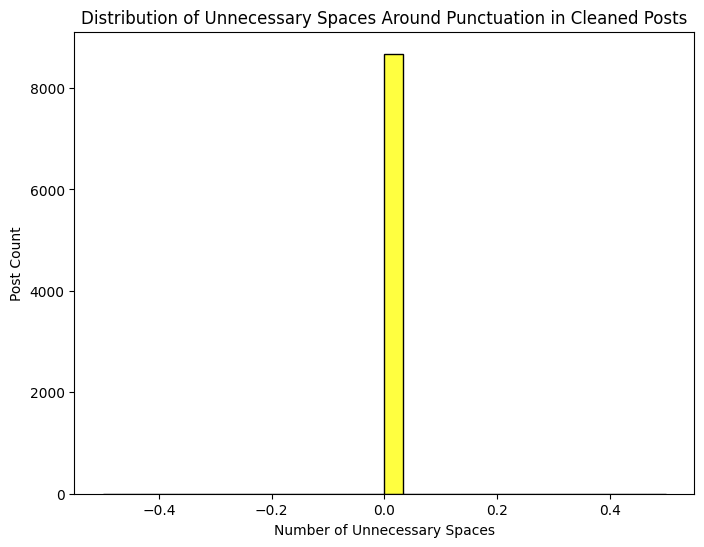

,unnecessary_punct_spaces_cleaned
count,8675.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [25]:
df['unnecessary_punct_spaces_cleaned'] = df['clean'].apply(count_unnecessary_spaces_around_punctuation)

plt.figure(figsize=(8, 6))
sns.histplot(df['unnecessary_punct_spaces_cleaned'], bins=30, kde=False, color='yellow')
plt.title('Distribution of Unnecessary Spaces Around Punctuation in Cleaned Posts')
plt.xlabel('Number of Unnecessary Spaces')
plt.ylabel('Post Count')
plt.show()

punctuation_space_stats_cleaned = df['unnecessary_punct_spaces_cleaned'].describe()
punctuation_space_stats_cleaned

<ipython-input-26-62b7d3afeeb0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=labels, y=counts, palette='tab10')


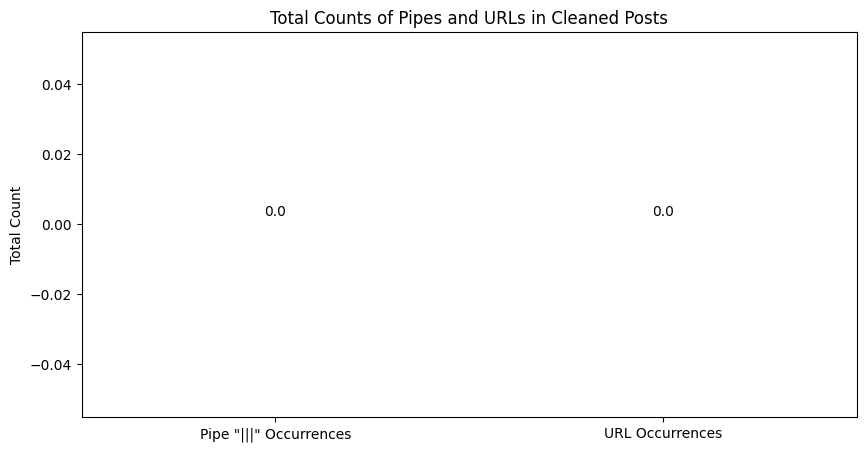

(0, 0)

In [26]:
df['pipe_count_cleaned'] = df['clean'].apply(count_pipes)
df['url_count_cleaned'] = df['clean'].apply(count_urls)

# Summing the counts for cleaned text
total_pipe_count_cleaned = df['pipe_count_cleaned'].sum()
total_url_count_cleaned = df['url_count_cleaned'].sum()

# Plotting the counts of pipes and URLs
plt.figure(figsize=(10, 5))
counts = [total_pipe_count_cleaned, total_url_count_cleaned]
labels = ['Pipe "|||" Occurrences', 'URL Occurrences']
barplot = sns.barplot(x=labels, y=counts, palette='tab10')
plt.title('Total Counts of Pipes and URLs in Cleaned Posts')
plt.ylabel('Total Count')

# Loop through the bars and add text annotations
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')
plt.show()

total_pipe_count_cleaned, total_url_count_cleaned

In [27]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from tqdm import tqdm

# Encode MBTI types into numeric labels
le = LabelEncoder()
df['encoded_labels'] = le.fit_transform(df['type'])  # Convert MBTI types to integer labels

# Stratified split of training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['clean'], df['encoded_labels'], test_size=0.2, stratify=df['encoded_labels']
)


In [ ]:
def mbti_to_string(label):
    return le.inverse_transform([label.item()])[0]

In [ ]:
# Load the tokenizer and model
model_name = "distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=16)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Dataset class for PyTorch
class MBTIDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        encoding = self.tokenizer(text, return_tensors="pt", truncation=True, padding='max_length', max_length=self.max_len)
        inputs = {key: val.squeeze(0) for key, val in encoding.items()}  # Remove batch dim
        return inputs, torch.tensor(label, dtype=torch.long)

# Create the dataset and dataloader with the upsampled data
train_dataset = MBTIDataset(train_texts, train_labels, tokenizer)
val_dataset = MBTIDataset(val_texts, val_labels, tokenizer)
# train_dataset = MBTIDataset(data_upsampled['clean'], data_upsampled['encoded_labels'], tokenizer)
# val_dataset = MBTIDataset(val_texts, val_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# Define optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

 # Training Loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

cuda


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-5): 6 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (

In [ ]:
def train(epochs):
    num_epochs = epochs  # Example: You can adjust the number of epochs

    for epoch in range(num_epochs):
        # TRAINING PHASE
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        # Dimension-wise accuracy
        correct_ie = 0
        correct_sn = 0
        correct_tf = 0
        correct_pj = 0
        total_partial_accuracy = 0

        print(f"Epoch {epoch+1}/{num_epochs}")

        train_progress_bar = tqdm(train_loader, desc=f"Training Epoch {epoch+1}")
        for batch in train_progress_bar:
            inputs, labels = batch
            inputs = {key: val.to(device) for key, val in inputs.items()}
            labels = labels.to(device)

            # Forward pass
            outputs = model(**inputs)
            logits = outputs.logits
            loss = criterion(logits, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            # Accuracy calculations
            _, preds = torch.max(logits, dim=1)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

            # Calculate dimension-wise accuracy and partial credit
            for i in range(len(labels)):
                true_label = mbti_to_string(labels[i])  # Convert index to MBTI string
                pred_label = mbti_to_string(preds[i])  # Convert predicted index to MBTI string

                # Check individual dimensions
                correct_ie += int(true_label[0] == pred_label[0])  # I/E
                correct_sn += int(true_label[1] == pred_label[1])  # S/N
                correct_tf += int(true_label[2] == pred_label[2])  # T/F
                correct_pj += int(true_label[3] == pred_label[3])  # P/J

                # Partial accuracy (0.25 per correct dimension)
                partial_accuracy = (
                    (true_label[0] == pred_label[0]) +
                    (true_label[1] == pred_label[1]) +
                    (true_label[2] == pred_label[2]) +
                    (true_label[3] == pred_label[3])
                ) / 4.0
                total_partial_accuracy += partial_accuracy

            # Update progress bar
            train_progress_bar.set_postfix({
                "Loss": f"{loss.item():.4f}",
                "Accuracy": f"{(correct / total):.4f}",
                "IE Acc": f"{(correct_ie / total):.4f}",
                "SN Acc": f"{(correct_sn / total):.4f}",
                "TF Acc": f"{(correct_tf / total):.4f}",
                "PJ Acc": f"{(correct_pj / total):.4f}",
                "Partial Acc": f"{(total_partial_accuracy / total):.4f}"
            })

        avg_loss = total_loss / len(train_loader)
        accuracy = correct / total
        avg_partial_accuracy = total_partial_accuracy / total

        print(f"Training Loss: {avg_loss:.4f}, Training Accuracy: {accuracy:.4f}, Partial Accuracy: {avg_partial_accuracy:.4f}")
        print(f"IE Acc: {correct_ie / total:.4f}, SN Acc: {correct_sn / total:.4f}, TF Acc: {correct_tf / total:.4f}, PJ Acc: {correct_pj / total:.4f}")

        # VALIDATION PHASE
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0
        val_partial_accuracy = 0
        val_correct_ie = 0
        val_correct_sn = 0
        val_correct_tf = 0
        val_correct_pj = 0

        val_progress_bar = tqdm(val_loader, desc=f"Validation Epoch {epoch+1}")
        with torch.no_grad():
            for batch in val_progress_bar:
                inputs, labels = batch
                inputs = {key: val.to(device) for key, val in inputs.items()}
                labels = labels.to(device)

                outputs = model(**inputs)
                logits = outputs.logits
                loss = criterion(logits, labels)
                val_loss += loss.item()

                # Accuracy calculations
                _, preds = torch.max(logits, dim=1)
                val_correct += torch.sum(preds == labels).item()
                val_total += labels.size(0)

                # Calculate dimension-wise accuracy and partial credit
                for i in range(len(labels)):
                    true_label = mbti_to_string(labels[i])
                    pred_label = mbti_to_string(preds[i])

                    # Check individual dimensions
                    val_correct_ie += int(true_label[0] == pred_label[0])
                    val_correct_sn += int(true_label[1] == pred_label[1])
                    val_correct_tf += int(true_label[2] == pred_label[2])
                    val_correct_pj += int(true_label[3] == pred_label[3])

                    # Partial accuracy (0.25 per correct dimension)
                    partial_accuracy = (
                        (true_label[0] == pred_label[0]) +
                        (true_label[1] == pred_label[1]) +
                        (true_label[2] == pred_label[2]) +
                        (true_label[3] == pred_label[3])
                    ) / 4.0
                    val_partial_accuracy += partial_accuracy

                # Update validation progress bar
                val_progress_bar.set_postfix({
                    "Val Loss": f"{loss.item():.4f}",
                    "Val Accuracy": f"{(val_correct / val_total):.4f}",
                    "Val IE Acc": f"{(val_correct_ie / val_total):.4f}",
                    "Val SN Acc": f"{(val_correct_sn / val_total):.4f}",
                    "Val TF Acc": f"{(val_correct_tf / val_total):.4f}",
                    "Val PJ Acc": f"{(val_correct_pj / val_total):.4f}",
                    "Partial Acc": f"{(val_partial_accuracy / val_total):.4f}"
                })

        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = val_correct / val_total
        avg_val_partial_accuracy = val_partial_accuracy / val_total

        print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}, Partial Accuracy: {avg_val_partial_accuracy:.4f}")
        print(f"Val IE Acc: {val_correct_ie / val_total:.4f}, Val SN Acc: {val_correct_sn / val_total:.4f}, Val TF Acc: {val_correct_tf / val_total:.4f}, Val PJ Acc: {val_correct_pj / val_total:.4f}")


In [ ]:
train(1)

Epoch 1/1


Training Epoch 1: 100%|██████████| 109/109 [01:32<00:00,  1.17it/s, Loss=2.1428, Accuracy=0.2238, IE Acc=0.7670, SN Acc=0.8586, TF Acc=0.6182, PJ Acc=0.5561, Partial Acc=0.7000]


Training Loss: 2.2555, Training Accuracy: 0.2238, Partial Accuracy: 0.7000
IE Acc: 0.7670, SN Acc: 0.8586, TF Acc: 0.6182, PJ Acc: 0.5561


Validation Epoch 1: 100%|██████████| 28/28 [00:10<00:00,  2.58it/s, Val Loss=2.5824, Val Accuracy=0.2865, Val IE Acc=0.7689, Val SN Acc=0.8617, Val TF Acc=0.7395, Val PJ Acc=0.6265, Partial Acc=0.7491]

Validation Loss: 2.1418, Validation Accuracy: 0.2865, Partial Accuracy: 0.7491
Val IE Acc: 0.7689, Val SN Acc: 0.8617, Val TF Acc: 0.7395, Val PJ Acc: 0.6265


In [ ]:
train(3)

Epoch 1/3


Training Epoch 1: 100%|██████████| 109/109 [01:31<00:00,  1.20it/s, Loss=1.8517, Accuracy=0.2833, IE Acc=0.7473, SN Acc=0.8622, TF Acc=0.7591, PJ Acc=0.5810, Partial Acc=0.7374]


Training Loss: 2.0450, Training Accuracy: 0.2833, Partial Accuracy: 0.7374
IE Acc: 0.7473, SN Acc: 0.8622, TF Acc: 0.7591, PJ Acc: 0.5810


Validation Epoch 1: 100%|██████████| 28/28 [00:10<00:00,  2.64it/s, Val Loss=2.3194, Val Accuracy=0.3170, Val IE Acc=0.7464, Val SN Acc=0.8617, Val TF Acc=0.7850, Val PJ Acc=0.6063, Partial Acc=0.7499]


Validation Loss: 1.9724, Validation Accuracy: 0.3170, Partial Accuracy: 0.7499
Val IE Acc: 0.7464, Val SN Acc: 0.8617, Val TF Acc: 0.7850, Val PJ Acc: 0.6063
Epoch 2/3


Training Epoch 2: 100%|██████████| 109/109 [01:31<00:00,  1.20it/s, Loss=1.4915, Accuracy=0.3867, IE Acc=0.7813, SN Acc=0.8617, TF Acc=0.8072, PJ Acc=0.6242, Partial Acc=0.7686]


Training Loss: 1.8270, Training Accuracy: 0.3867, Partial Accuracy: 0.7686
IE Acc: 0.7813, SN Acc: 0.8617, TF Acc: 0.8072, PJ Acc: 0.6242


Validation Epoch 2: 100%|██████████| 28/28 [00:10<00:00,  2.63it/s, Val Loss=2.2363, Val Accuracy=0.4150, Val IE Acc=0.7890, Val SN Acc=0.8663, Val TF Acc=0.7723, Val PJ Acc=0.6824, Partial Acc=0.7775]


Validation Loss: 1.8742, Validation Accuracy: 0.4150, Partial Accuracy: 0.7775
Val IE Acc: 0.7890, Val SN Acc: 0.8663, Val TF Acc: 0.7723, Val PJ Acc: 0.6824
Epoch 3/3


Training Epoch 3: 100%|██████████| 109/109 [01:31<00:00,  1.20it/s, Loss=1.2472, Accuracy=0.5007, IE Acc=0.8170, SN Acc=0.8677, TF Acc=0.8450, PJ Acc=0.7157, Partial Acc=0.8113]


Training Loss: 1.5937, Training Accuracy: 0.5007, Partial Accuracy: 0.8113
IE Acc: 0.8170, SN Acc: 0.8677, TF Acc: 0.8450, PJ Acc: 0.7157


Validation Epoch 3: 100%|██████████| 28/28 [00:10<00:00,  2.63it/s, Val Loss=1.7268, Val Accuracy=0.4444, Val IE Acc=0.7862, Val SN Acc=0.8392, Val TF Acc=0.7942, Val PJ Acc=0.6899, Partial Acc=0.7774]

Validation Loss: 1.7636, Validation Accuracy: 0.4444, Partial Accuracy: 0.7774
Val IE Acc: 0.7862, Val SN Acc: 0.8392, Val TF Acc: 0.7942, Val PJ Acc: 0.6899


In [ ]:
train(2)

Epoch 1/2


Training Epoch 1: 100%|██████████| 109/109 [01:31<00:00,  1.19it/s, Loss=1.0224, Accuracy=0.5661, IE Acc=0.8405, SN Acc=0.8833, TF Acc=0.8671, PJ Acc=0.7579, Partial Acc=0.8372]


Training Loss: 1.4013, Training Accuracy: 0.5661, Partial Accuracy: 0.8372
IE Acc: 0.8405, SN Acc: 0.8833, TF Acc: 0.8671, PJ Acc: 0.7579


Validation Epoch 1: 100%|██████████| 28/28 [00:10<00:00,  2.64it/s, Val Loss=1.8083, Val Accuracy=0.4605, Val IE Acc=0.7839, Val SN Acc=0.8513, Val TF Acc=0.7977, Val PJ Acc=0.7216, Partial Acc=0.7886]


Validation Loss: 1.8050, Validation Accuracy: 0.4605, Partial Accuracy: 0.7886
Val IE Acc: 0.7839, Val SN Acc: 0.8513, Val TF Acc: 0.7977, Val PJ Acc: 0.7216
Epoch 2/2


Training Epoch 2: 100%|██████████| 109/109 [01:31<00:00,  1.20it/s, Loss=1.0214, Accuracy=0.6102, IE Acc=0.8540, SN Acc=0.8955, TF Acc=0.8896, PJ Acc=0.7840, Partial Acc=0.8558]


Training Loss: 1.2543, Training Accuracy: 0.6102, Partial Accuracy: 0.8558
IE Acc: 0.8540, SN Acc: 0.8955, TF Acc: 0.8896, PJ Acc: 0.7840


Validation Epoch 2: 100%|██████████| 28/28 [00:10<00:00,  2.63it/s, Val Loss=2.4897, Val Accuracy=0.4519, Val IE Acc=0.7729, Val SN Acc=0.8703, Val TF Acc=0.7752, Val PJ Acc=0.7205, Partial Acc=0.7847]

Validation Loss: 1.8899, Validation Accuracy: 0.4519, Partial Accuracy: 0.7847
Val IE Acc: 0.7729, Val SN Acc: 0.8703, Val TF Acc: 0.7752, Val PJ Acc: 0.7205


In [ ]:
train(1)

Epoch 1/1


Training Epoch 1: 100%|██████████| 109/109 [01:31<00:00,  1.19it/s, Loss=0.7891, Accuracy=0.6671, IE Acc=0.8725, SN Acc=0.9078, TF Acc=0.9153, PJ Acc=0.8156, Partial Acc=0.8778]


Training Loss: 1.0631, Training Accuracy: 0.6671, Partial Accuracy: 0.8778
IE Acc: 0.8725, SN Acc: 0.9078, TF Acc: 0.9153, PJ Acc: 0.8156


Validation Epoch 1: 100%|██████████| 28/28 [00:10<00:00,  2.63it/s, Val Loss=2.0279, Val Accuracy=0.4715, Val IE Acc=0.8063, Val SN Acc=0.8594, Val TF Acc=0.7839, Val PJ Acc=0.7251, Partial Acc=0.7937]

Validation Loss: 1.8637, Validation Accuracy: 0.4715, Partial Accuracy: 0.7937
Val IE Acc: 0.8063, Val SN Acc: 0.8594, Val TF Acc: 0.7839, Val PJ Acc: 0.7251


In [ ]:
train(2)

Epoch 1/2


Training Epoch 1: 100%|██████████| 109/109 [01:31<00:00,  1.19it/s, Loss=0.7363, Accuracy=0.7336, IE Acc=0.9004, SN Acc=0.9272, TF Acc=0.9360, PJ Acc=0.8504, Partial Acc=0.9035]


Training Loss: 0.8752, Training Accuracy: 0.7336, Partial Accuracy: 0.9035
IE Acc: 0.9004, SN Acc: 0.9272, TF Acc: 0.9360, PJ Acc: 0.8504


Validation Epoch 1: 100%|██████████| 28/28 [00:10<00:00,  2.64it/s, Val Loss=2.4278, Val Accuracy=0.4680, Val IE Acc=0.7919, Val SN Acc=0.8767, Val TF Acc=0.7856, Val PJ Acc=0.7297, Partial Acc=0.7960]


Validation Loss: 1.9821, Validation Accuracy: 0.4680, Partial Accuracy: 0.7960
Val IE Acc: 0.7919, Val SN Acc: 0.8767, Val TF Acc: 0.7856, Val PJ Acc: 0.7297
Epoch 2/2


Training Epoch 2: 100%|██████████| 109/109 [01:31<00:00,  1.19it/s, Loss=0.5464, Accuracy=0.7781, IE Acc=0.9156, SN Acc=0.9464, TF Acc=0.9464, PJ Acc=0.8768, Partial Acc=0.9213]


Training Loss: 0.7173, Training Accuracy: 0.7781, Partial Accuracy: 0.9213
IE Acc: 0.9156, SN Acc: 0.9464, TF Acc: 0.9464, PJ Acc: 0.8768


Validation Epoch 2: 100%|██████████| 28/28 [00:10<00:00,  2.63it/s, Val Loss=2.6462, Val Accuracy=0.4605, Val IE Acc=0.7741, Val SN Acc=0.8548, Val TF Acc=0.7885, Val PJ Acc=0.7164, Partial Acc=0.7834]

Validation Loss: 2.1102, Validation Accuracy: 0.4605, Partial Accuracy: 0.7834
Val IE Acc: 0.7741, Val SN Acc: 0.8548, Val TF Acc: 0.7885, Val PJ Acc: 0.7164


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# VALIDATION PHASE
model.eval()
val_loss = 0
val_correct = 0
val_total = 0
all_val_labels = []
all_val_preds = []

val_progress_bar = tqdm(val_loader, desc=f"Validation")
with torch.no_grad():
    for batch in val_progress_bar:
        inputs, labels = batch
        inputs = {key: val.to(device) for key, val in inputs.items()}
        labels = labels.to(device)

        outputs = model(**inputs)
        logits = outputs.logits
        loss = criterion(logits, labels)
        val_loss += loss.item()

        # Accuracy
        _, preds = torch.max(logits, dim=1)
        val_correct += torch.sum(preds == labels).item()
        val_total += labels.size(0)

        # Collect predictions and true labels
        all_val_labels.extend(labels.cpu().numpy())
        all_val_preds.extend(preds.cpu().numpy())

        # Update validation progress bar
        val_progress_bar.set_postfix({"Val Loss": f"{loss.item():.4f}", "Val Accuracy": f"{(val_correct / val_total):.4f}"})

avg_val_loss = val_loss / len(val_loader)
val_accuracy = val_correct / val_total
print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Classification Report
report = classification_report(all_val_labels, all_val_preds, zero_division=0)
print("Classification Report:\n", report)


Validation: 100%|██████████| 92/92 [00:50<00:00,  1.84it/s, Val Loss=0.2574, Val Accuracy=0.9036]

Validation Loss: 0.3115, Validation Accuracy: 0.9036
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       367
           1       0.89      0.85      0.87       366
           2       0.96      1.00      0.98       366
           3       0.79      0.90      0.84       367
           4       0.99      1.00      1.00       367
           5       1.00      1.00      1.00       366
           6       1.00      1.00      1.00       367
           7       0.98      1.00      0.99       367
           8       0.88      0.50      0.63       366
           9       0.62      0.83      0.71       366
          10       0.75      0.79      0.77       366
          11       0.86      0.66      0.75       366
          12       0.99      0.98      0.98       367
          13       0.95      0.99      0.97       366
          14       0.97      0.99      0.98       367
          15       0.96      0.97      0.96       366

   

In [ ]:
def save_model():
    # After training is complete (e.g., after 3 epochs)
    model_save_path = "mbti_classification_model.pth"
    optimizer_save_path = "mbti_optimizer.pth"

    # Save the model state dict (weights) and optimizer state dict
    torch.save(model.state_dict(), model_save_path)
    torch.save(optimizer.state_dict(), optimizer_save_path)
    print("Model and optimizer have been saved.")

In [ ]:
# To load the saved model and optimizer
model_load_path = "mbti_classification_model.pth"
optimizer_load_path = "mbti_optimizer.pth"

# Make sure the model architecture is the same
model = AutoModelForSequenceClassification.from_pretrained("flaubert/flaubert_small_cased", num_labels=16)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Load the saved state dicts into the model and optimizer
model.load_state_dict(torch.load(model_load_path))
optimizer.load_state_dict(torch.load(optimizer_load_path))

# Move model to the device (if using GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
zzzzz
# Ensure optimizer tensors are also on the correct device
for state in optimizer.state.values():
    for k, v in state.items():
        if isinstance(v, torch.Tensor):
            state[k] = v.to(device)

print("Model and optimizer states have been loaded. Ready to continue training.")

Some weights of FlaubertForSequenceClassification were not initialized from the model checkpoint at flaubert/flaubert_small_cased and are newly initialized: ['sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model and optimizer states have been loaded. Ready to continue training.
